## Resume for John Koplimae

### Welcome! Here I have turned my resume into a .csv and using a few different python libraries I have imported the file and plotted it.

In [26]:
# Import Libraries to be used for this notebook

import pandas as pd
import numpy as np

# Matplotlob - for creating visualizations
import matplotlib.pyplot as plt
%matplotlib inline

# geocoding libraries
#!pip install geopy
from geopy.geocoders import Nominatim # Convert an address into latitude and longitude values
#!pip install geocoder
import geocoder # to get spatial coordinates

# Folium - map rendering library
#!pip install folium
import folium

print("Libraries Imported.")

Libraries Imported.


#### Following hidden code is used to import and read a .csv file and turn it into a dataframe.

In [68]:

import types
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

@hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
 abc = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='#',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_#.get_object(Bucket='pythonresume-donotdelete-pr-ksd26pdqdibelj',Key='Work_History_2020 - Sheet1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


,Restaurant Name,Date Worked,Position,Address
0,NaN,NaN,NaN,NaN
1,Drake Commissary,August 2019 - March 2020,Catering Chef,"128a Sterling Rd, Toronto, ON M6P 0A1"
2,Superfly,February 2019 - July 2019,Chef,"5 Brock Ave, Toronto, ON M6K 2K6"
3,Restaurant Kadeau,October 2018,Intern,"Wildersgade 10B, 1408 København, Denmark"
4,Restaurant Noma,July 2018 - October 2018,Intern,"Refshalevej 96, 1432 København K, Denmark"


In [28]:
# Create new df and drop row with NaN info

work_history = df_data_1.drop(0, axis=0)
work_history = work_history.reset_index(drop=True)
work_history

,Restaurant Name,Date Worked,Position,Address
0,Drake Commissary,August 2019 - March 2020,Catering Chef,"128a Sterling Rd, Toronto, ON M6P 0A1"
1,Superfly,February 2019 - July 2019,Chef,"5 Brock Ave, Toronto, ON M6K 2K6"
2,Restaurant Kadeau,October 2018,Intern,"Wildersgade 10B, 1408 København, Denmark"
3,Restaurant Noma,July 2018 - October 2018,Intern,"Refshalevej 96, 1432 København K, Denmark"
4,The Drake Hotel,January 2011 - October 2018,Sous Chef,"1150 Queen St W, Toronto, ON M6J 1J3"
5,Drake One Fifty,August 2013 - February 2014,Line Cook,"150 York St, Toronto, ON M5H 3S5"
6,Cumbraes Butcher Shop,December 2010 - February 2014,Kitchen/Counter help,"1591 Bayview Ave, East York, ON M4G 3B5"
7,Duke of Westminster,March 2010 - October 2010,Sous Chef,"77 Adelaide Street West, Toronto, ON M5X 1A6"
8,Duke of York,December 2009 - March 2010,Line Cook,"39 Prince Arthur Ave, Toronto, ON M5R 1B2"
9,Bymark Restaurant,July 2009 - December 2009,Line Cook,"66 Wellington St W, Toronto, ON M5K 1M6"


In [29]:
# Create a new df and change the string variable in the Position column to an integer so it can be plotted later

#kitchen_rolls = work_history[['Position']]
kitchen_position = pd.DataFrame()

kitchen_position['Freq'] = work_history.Position.str.count('')
kitchen_position['Position'] = work_history[['Position']]
test = kitchen_position.groupby('Position').count()
test

,Freq
Position,
Catering Chef,1
Chef,1
Intern,2
Kitchen/Counter help,1
Line Cook,8
Sous Chef,2


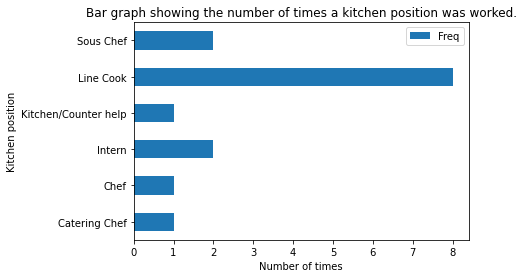

In [30]:
# Visualize the number of times a certain kitchen position was held.

test.plot(kind= 'barh')

plt.title('Bar graph showing the number of times a kitchen position was worked.')
plt.ylabel('Kitchen position')
plt.xlabel('Number of times')

plt.show()

In [31]:
work_history_geo = work_history.copy()

address = work_history['Address']

latitude = []
longitude = []
n = 0

while n < len(address):
    g = geocoder.arcgis('{}'.format(address[n]))
    lat_lng_coords = g.latlng
    print('The geographical coordinates of {} are {}, {}.'.format((work_history['Restaurant Name'])[n], lat_lng_coords[0], lat_lng_coords[1]))
    latitude.append(lat_lng_coords[0])
    longitude.append(lat_lng_coords[1])
    n = n + 1
    
work_history_geo['Latitude'] = latitude
work_history_geo['Longitude'] = longitude

work_history_geo

The geographical coordinates of Drake Commissary are 43.65385272810717, -79.44469253786876.
The geographical coordinates of Superfly are 43.64204998297711, -79.43218000206733.
The geographical coordinates of Restaurant Kadeau are 55.672325755316905, 12.588909879601061.
The geographical coordinates of Restaurant Noma are 55.683152827286705, 12.610426225052407.
The geographical coordinates of The Drake Hotel are 43.64327998535859, -79.4245900211039.
The geographical coordinates of Drake One Fifty are 43.6496799875282, -79.38455000491093.
The geographical coordinates of Cumbraes Butcher Shop are 43.70608001188657, -79.37492003635266.
The geographical coordinates of Duke of Westminster are 43.64939001558787, -79.38214004010993.
The geographical coordinates of Duke of York are 43.66918999872598, -79.3973899909283.
The geographical coordinates of Bymark Restaurant are 43.64722999913954, -79.38117997692022.
The geographical coordinates of Forte Bisto are 43.65016999358784, -79.38481998601222.

,Restaurant Name,Date Worked,Position,Address,Latitude,Longitude
0,Drake Commissary,August 2019 - March 2020,Catering Chef,"128a Sterling Rd, Toronto, ON M6P 0A1",43.653853,-79.444693
1,Superfly,February 2019 - July 2019,Chef,"5 Brock Ave, Toronto, ON M6K 2K6",43.642050,-79.432180
2,Restaurant Kadeau,October 2018,Intern,"Wildersgade 10B, 1408 København, Denmark",55.672326,12.588910
3,Restaurant Noma,July 2018 - October 2018,Intern,"Refshalevej 96, 1432 København K, Denmark",55.683153,12.610426
4,The Drake Hotel,January 2011 - October 2018,Sous Chef,"1150 Queen St W, Toronto, ON M6J 1J3",43.643280,-79.424590
5,Drake One Fifty,August 2013 - February 2014,Line Cook,"150 York St, Toronto, ON M5H 3S5",43.649680,-79.384550
6,Cumbraes Butcher Shop,December 2010 - February 2014,Kitchen/Counter help,"1591 Bayview Ave, East York, ON M4G 3B5",43.706080,-79.374920
7,Duke of Westminster,March 2010 - October 2010,Sous Chef,"77 Adelaide Street West, Toronto, ON M5X 1A6",43.649390,-79.382140
8,Duke of York,December 2009 - March 2010,Line Cook,"39 Prince Arthur Ave, Toronto, ON M5R 1B2",43.669190,-79.397390
9,Bymark Restaurant,July 2009 - December 2009,Line Cook,"66 Wellington St W, Toronto, ON M5K 1M6",43.647230,-79.381180


## Creating maps of Toronto and Copenhagen with restaurant locations

In [52]:
# get the coordinates of Toronto
address_TO = 'Toronto, Ontario'

geolocator = Nominatim(user_agent="project")
location = geolocator.geocode(address_TO)
latitude_TO = location.latitude
longitude_TO = location.longitude
print('The geograpical coordinate of Toronto, Ontario {}, {}.'.format(latitude_TO, longitude_TO))

The geograpical coordinate of Toronto, Ontario 43.6534817, -79.3839347.


In [67]:
# Map of Toronto with markers and pop-up labels for restaurant location
Toronto_map = folium.Map(location=[latitude_TO, longitude_TO], zoom_start=12)

# adding markers and pop-up labels to the map
for lat, lng, restaurant in zip(work_history_geo['Latitude'], work_history_geo['Longitude'], work_history['Restaurant Name']):
    label = '{}'.format(restaurant)
    label = folium.Popup(label, parse_html=True)
    folium.Marker([lat, lng], popup=restaurant).add_to(Toronto_map)
    folium.CircleMarker(
    [lat, lng],
    radius=5,
    popup=label,
    color='red',
    fill=True,
    fill_color='blue',
    fill_opacity=0.5).add_to(Toronto_map)
    
Toronto_map

In [54]:
# get the coordinates of Copenhagen
address_DK = 'Copenhagen, Denmark'

geolocator = Nominatim(user_agent="project2")
location = geolocator.geocode(address_DK)
latitude_DK = location.latitude
longitude_DK = location.longitude
print('The geograpical coordinate of Copenhagen, Denmark {}, {}.'.format(latitude_DK, longitude_DK))

The geograpical coordinate of Copenhagen, Denmark 55.6867243, 12.5700724.


In [66]:
Copenhagen_map = folium.Map(location=[latitude_DK, longitude_DK], zoom_start=14)

# adding markers and pop-up labels to the map

for lat, lng, restaurant in zip(work_history_geo['Latitude'], work_history_geo['Longitude'], work_history['Restaurant Name']):
    label = '{}'.format(restaurant)
    label = folium.Popup(label, parse_html=True)
    folium.Marker([lat, lng], popup=restaurant).add_to(Copenhagen_map)
    folium.CircleMarker(
    [lat, lng],
    radius=5,
    popup=label,
    color='red',
    fill=True,
    fill_color='blue',
    fill_opacity=0.5).add_to(Copenhagen_map)
    

Copenhagen_map

### Thank you for taking the time to view this coding exercise that visually shows my restaurant work experience and their locations.